# Introduction


Objective: Investigate house sales in the King County (Seattle) and build a model to predict a home's price given certain variables.



Data: The data can be found in the kc_house_data.csv file in this repository.

The column names and descriptions as provided can be found in the column_names.md file in this repository. For convenience they have been reproduced below.

Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Scenario

I am a real estate developer, in Seattle, looking to see what home feutures are likely to increase a homes value.

# import libraries


In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols


# Load Data

In [18]:
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Cleaning and EDA

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Drop ID, Condition, and Grade:
    ID is unique to each sale and not based on any relavent...
    Condition and Grade, as defined above, are vauge and unclear

In [20]:
data=data.drop(['id','condition','grade'],axis=1) #drop ['id','condition','grade'] variabels
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Convert date, sqft_basement to manipulatable data types.
Drop/deal with waterfront, view, yr_renovated null values

In [21]:
data['date'] = pd.to_datetime(data['date']) #convert from object

In [22]:
# convert basement
# data=data[data['sqft_basement'] != '?']
data['sqft_basement']=data['sqft_basement'].astype(str).astype(float)

ValueError: could not convert string to float: '?'

In [23]:
# convert basement and drop missing data
data=data[data['sqft_basement'] != '?']
data['sqft_basement']=data['sqft_basement'].astype(str).astype(float)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21143 non-null  datetime64[ns]
 1   price          21143 non-null  float64       
 2   bedrooms       21143 non-null  int64         
 3   bathrooms      21143 non-null  float64       
 4   sqft_living    21143 non-null  int64         
 5   sqft_lot       21143 non-null  int64         
 6   floors         21143 non-null  float64       
 7   waterfront     18804 non-null  float64       
 8   view           21082 non-null  float64       
 9   sqft_above     21143 non-null  int64         
 10  sqft_basement  21143 non-null  float64       
 11  yr_built       21143 non-null  int64         
 12  yr_renovated   17389 non-null  float64       
 13  zipcode        21143 non-null  int64         
 14  lat            21143 non-null  float64       
 15  long           2114

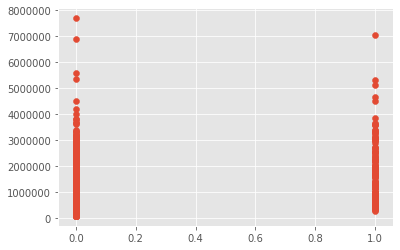

In [25]:
data['waterfront']
plt.scatter(data['waterfront'],data['price']) 

waterfront is a dummy variable so averaging doesnt make sense

In [26]:
data=data[data['waterfront'] .isnull()==False] # drop missing 'waterfront' data, rows

view is only missing a small number of data points so drop missing rows

In [27]:
data=data[data['view'] .isnull()==False] #drop missing 'view' data

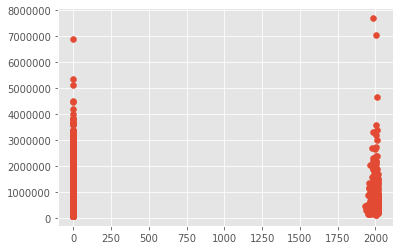

In [28]:
plt.scatter(data['yr_renovated'],data['price'])

yr_renovated is highly biforcated and has enought data to drop missing/null data


In [29]:
data=data[data['yr_renovated'] .isnull()==False] # drop missing 'yr_renovated' data, rows

In [30]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15429 non-null  datetime64[ns]
 1   price          15429 non-null  float64       
 2   bedrooms       15429 non-null  int64         
 3   bathrooms      15429 non-null  float64       
 4   sqft_living    15429 non-null  int64         
 5   sqft_lot       15429 non-null  int64         
 6   floors         15429 non-null  float64       
 7   waterfront     15429 non-null  float64       
 8   view           15429 non-null  float64       
 9   sqft_above     15429 non-null  int64         
 10  sqft_basement  15429 non-null  float64       
 11  yr_built       15429 non-null  int64         
 12  yr_renovated   15429 non-null  float64       
 13  zipcode        15429 non-null  int64         
 14  lat            15429 non-null  float64       
 15  long           1542

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

All data is numerical with no null values

check for outliers


In [31]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542900e+04,15429.000000,15429.000000,15429.00000,1.542900e+04,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.00000,15429.000000,15429.000000
mean,5.414978e+05,3.378767,2.121508,2085.51656,1.528616e+04,1.494556,0.007518,0.228855,1793.705230,291.811329,1971.130533,81.766544,98077.472098,47.559260,-122.21351,1990.926891,12862.281159
std,3.730219e+05,0.934200,0.767027,919.54924,4.199737e+04,0.538903,0.086384,0.759902,829.165362,443.366153,29.287947,395.668685,53.459610,0.138745,0.14048,684.796238,27783.533647
min,8.200000e+04,1.000000,0.500000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51900,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1430.00000,5.050000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469100,-122.32800,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.00000,7.620000e+03,1.500000,0.000000,0.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.22900,1850.000000,7626.000000
75%,6.435000e+05,4.000000,2.500000,2550.00000,1.072000e+04,2.000000,0.000000,0.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677600,-122.12400,2370.000000,10108.000000
max,7.700000e+06,33.000000,8.000000,13540.00000,1.651359e+06,3.500000,1.000000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,6210.000000,871200.000000


In [32]:
# at least 1 clear outlier; 33 bedroom house where 75% is 4
data=data[data['bedrooms']<33]

Check visually for outliers

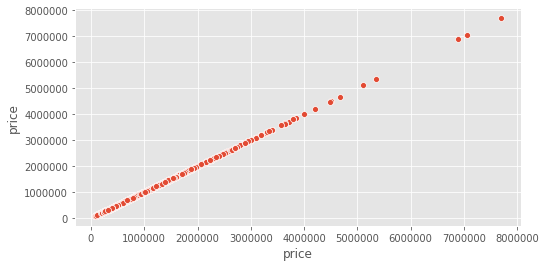

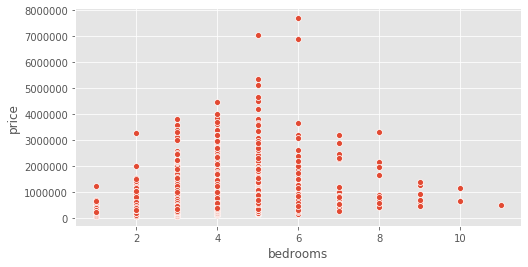

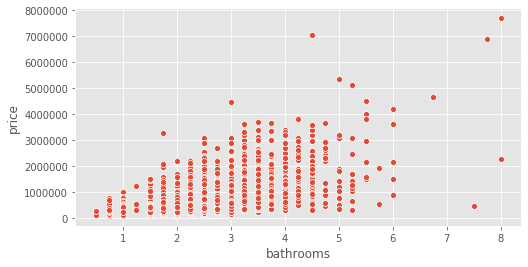

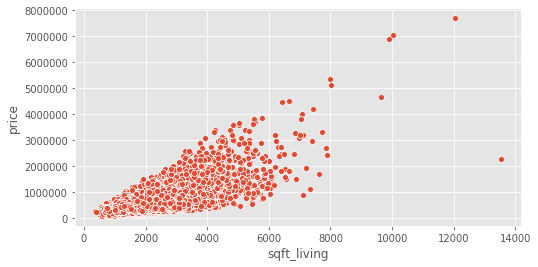

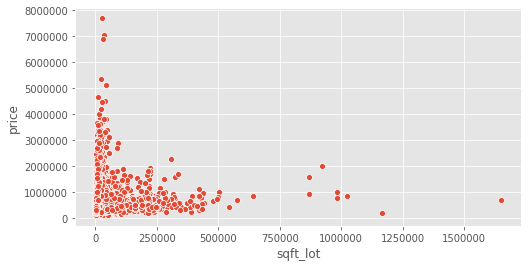

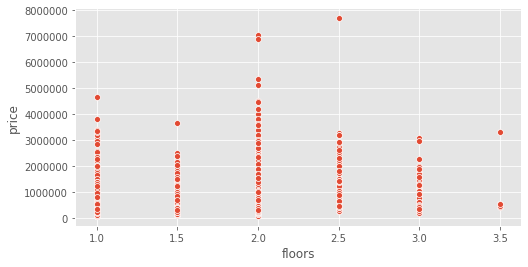

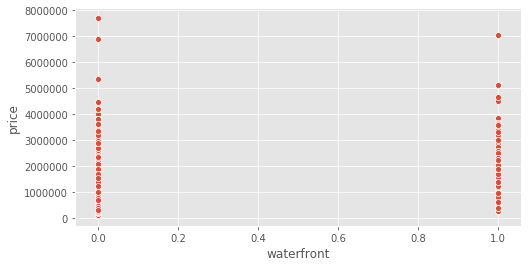

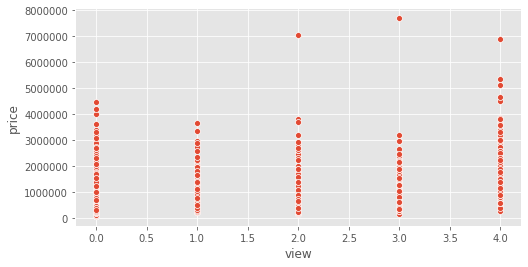

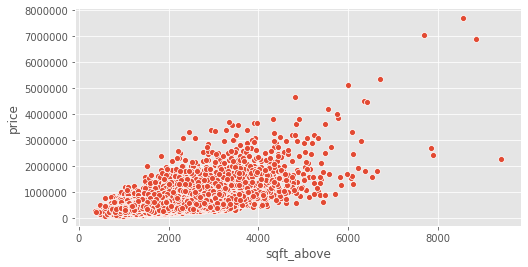

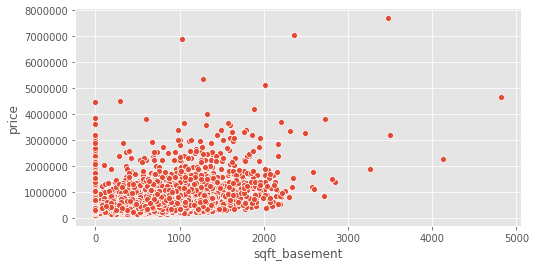

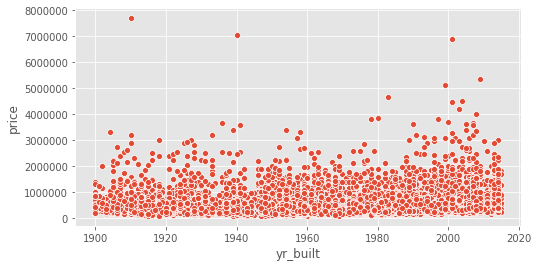

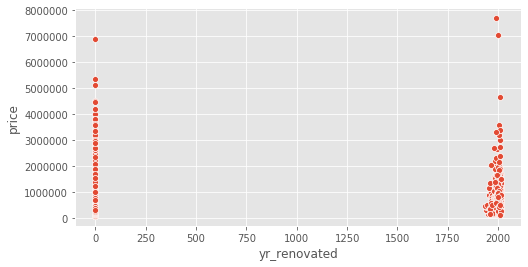

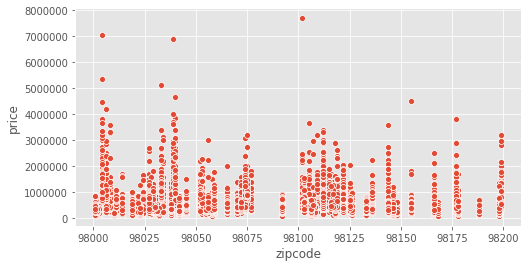

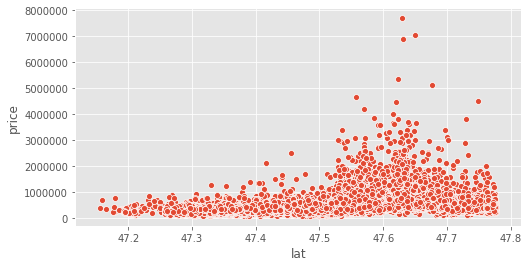

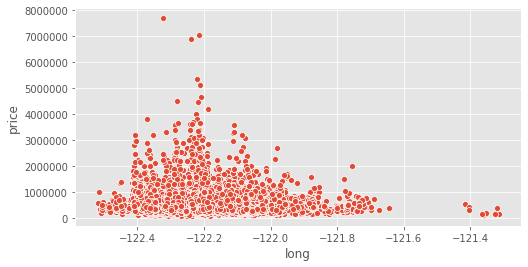

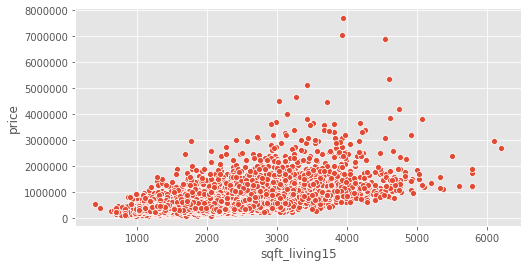

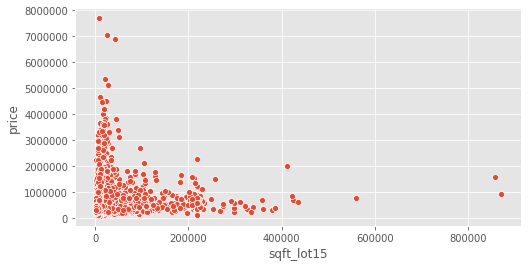

In [33]:
# look vizually for outliers
nd=list(data.columns)
nd.remove('date')
for i in nd:
    fig, ax = plt.subplots(figsize=(8,4))

    sns.scatterplot(data[i],data['price'])


In [34]:
# sqft_living; 2 data points over 12000
# sqft_lot: 1 data point over 1.5 million
# sqft_above: 3 data point over 8000
# sqft_basement: 2 data points over 4000
# long: 8-ish outlier (arounf -121.4): unclear if they are really outliers
# sgft_lot: 2 data points over 800,000

# drop the above data point (excluding long)
data=data[data['sqft_living']<12000]
data=data[data['sqft_lot']<1500000]
data=data[data['sqft_above']<8000]
data=data[data['sqft_basement']<4000]
data=data[data['sqft_lot15']<800000]
data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542100e+04,15421.000000,15421.000000,15421.000000,1.542100e+04,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000
mean,5.401305e+05,3.376046,2.119837,2082.700214,1.504900e+04,1.494391,0.007457,0.227677,1791.773750,290.926464,1971.130407,81.549835,98077.487193,47.559242,-122.213564,1990.326243,12710.767071
std,3.631698e+05,0.902379,0.761346,906.251260,3.860637e+04,0.538755,0.086036,0.757480,821.934415,439.889227,29.283235,395.165797,53.463849,0.138742,0.140439,683.864252,25775.091226
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.229000,1850.000000,7625.000000
75%,6.420000e+05,4.000000,2.500000,2550.000000,1.071000e+04,2.000000,0.000000,0.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677600,-122.124000,2370.000000,10106.000000
max,7.060000e+06,11.000000,7.500000,10040.000000,1.164794e+06,3.500000,1.000000,4.000000,7880.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000


Check for multicollinearity

In [35]:
# test for colleations in the variables
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.874884
"(sqft_living, sqft_living15)",0.760537


potential colinearity problems:
consider dropping sqft_living. It is in both pairs and is likely includeded  in other variables i.e. sqft_above and sqft_below

(sqft_above, sqft_living)	0.876449

(sqft_living15, sqft_living)	0.756714

Check for correlation with Price

In [36]:
data.corr()['price']


price            1.000000
bedrooms         0.314969
bathrooms        0.518126
sqft_living      0.701632
sqft_lot         0.084508
floors           0.263569
waterfront       0.276249
view             0.394035
sqft_above       0.607753
sqft_basement    0.309902
yr_built         0.052601
yr_renovated     0.115087
zipcode         -0.049514
lat              0.313877
long             0.022608
sqft_living15    0.589848
sqft_lot15       0.076714
Name: price, dtype: float64

Only 4 vaiables are  correlated with price

bathrooms        0.518126

sqft_living      0.701632

sqft_above       0.607753

sqft_living15    0.589848


# Feature Engineering

dummy variables and catagories

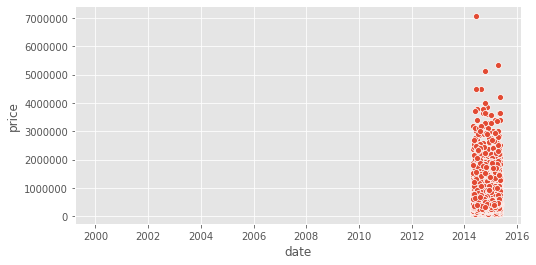

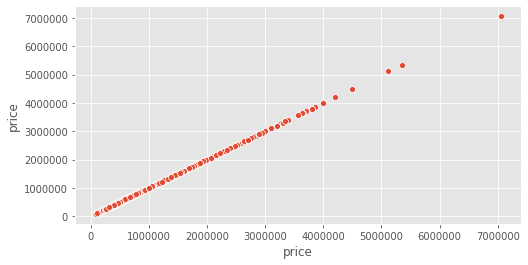

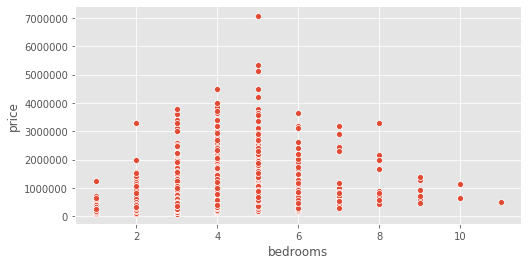

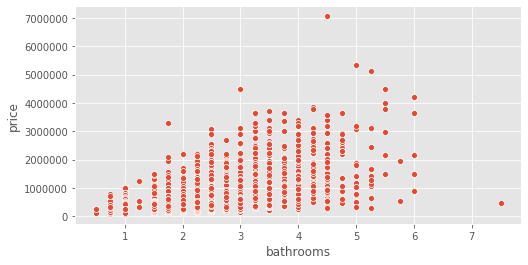

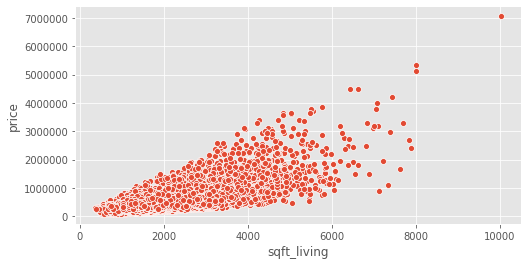

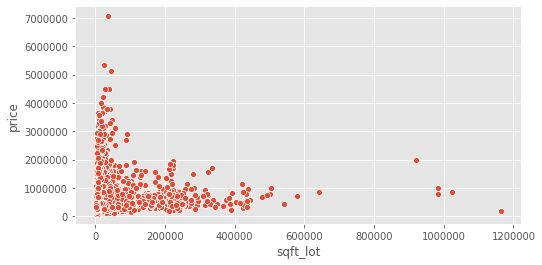

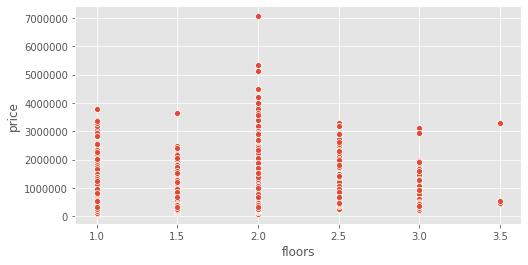

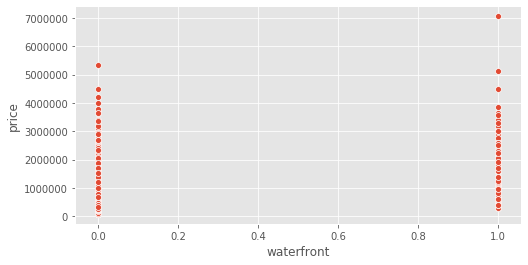

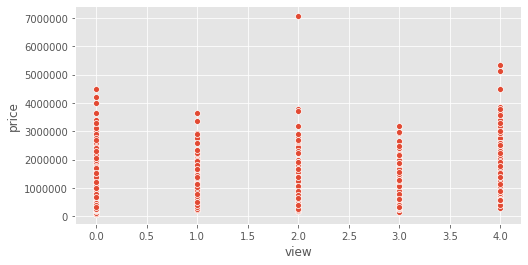

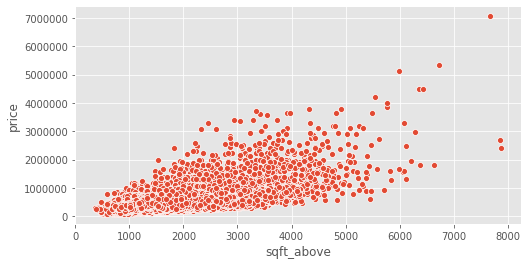

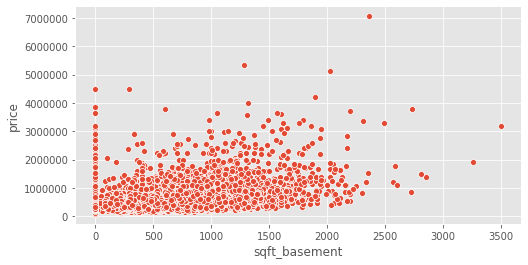

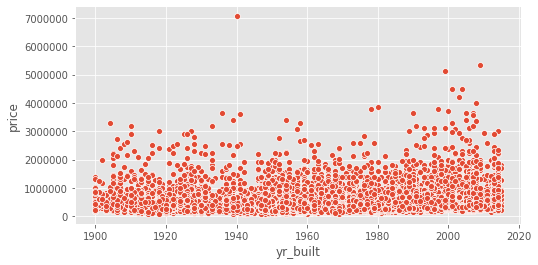

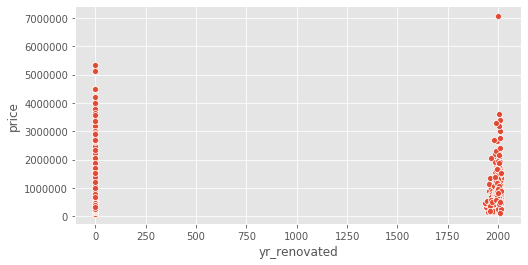

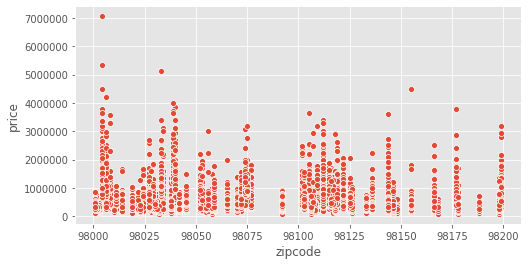

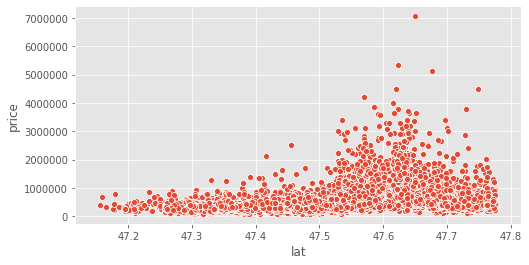

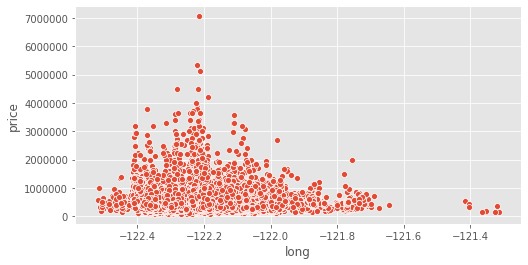

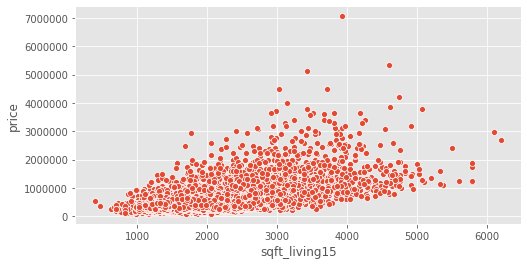

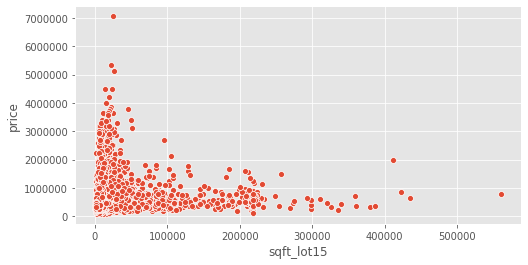

In [37]:
# look for catagories
nd=list(data.columns)
# nd.remove('date')
for i in nd:
    fig, ax = plt.subplots(figsize=(8,4))

    sns.scatterplot(data[i],data['price'])

In [38]:
# Potential Catagories and dummy

# bedrooms?
# floor?
# waterfront: built in dummy
# view?    
# yr_reonovated: catagory or dummy 
# zipcode

# cats=['bedrooms','bathrooms','floors','view','yr_renovated','zipcode']
# cat_names=['bedrooms_dummies','bathrooms_dummies','floors_dummies','view_dummies','yr_renovated_dummies','zipcode_dummies']

bedrooms_dummies=pd.get_dummies(data['bedrooms'], prefix='beds', drop_first=True)
floors_dummies=pd.get_dummies(data['floors'], prefix='floors', drop_first=True)
view_dummies=pd.get_dummies(data['view'], prefix='views', drop_first=True)
yr_renovated_dummies = pd.get_dummies(data['yr_renovated'], prefix='reno', drop_first=True)
zipcode_dummies= pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)

In [39]:
# add to dataframe
data2 = pd.concat([data,bedrooms_dummies,floors_dummies,view_dummies,yr_renovated_dummies,zipcode_dummies], axis=1)
data2.isnull().sum()


date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
              ..
zip_98177      0
zip_98178      0
zip_98188      0
zip_98198      0
zip_98199      0
Length: 174, dtype: int64

# Quesions

Q1: How significant is location on price?

We have lat and long and zipcode as proxies.

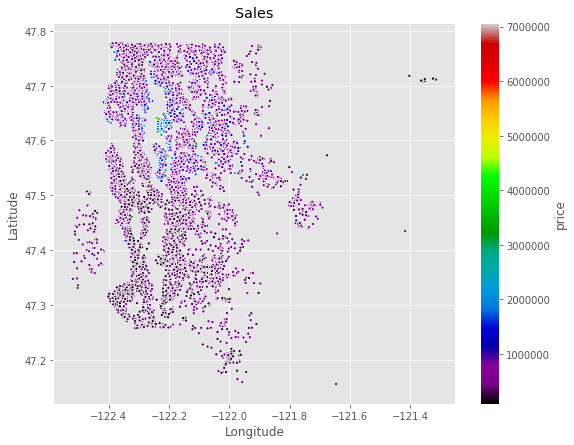

In [40]:

# scatter plot "mapping" lat and long.
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = data['long'], y = data['lat'], hue = data['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = data)

norm = plt.Normalize(data['price'].min(), data['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sales')
plt.show()


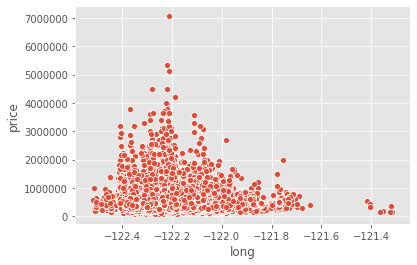

In [41]:
sns.scatterplot(x = data['long'], y = data['price'])


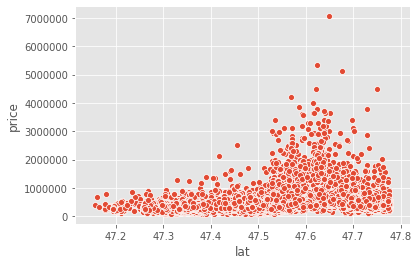

In [42]:
sns.scatterplot(x = data['lat'], y = data['price'])


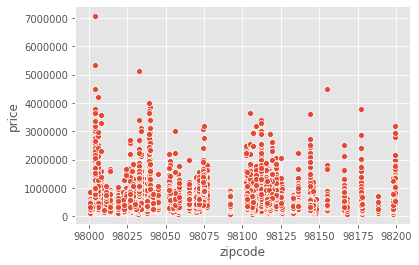

In [43]:
sns.scatterplot(x = data['zipcode'], y = data['price'])


Answer:

Lat and long look to generally be poor predictors of price. 

There does, however, seems to be a loose correlation between lat alone and price. 

Simmilarly, while zipcode is a poor predictor of price, most of the more expensize homes are concentrated in a few zipcodes. 

Q2: Is outdoor space i.e. squarefootage in the 'lot' that is not accupied by the house, usefull?

In [44]:
#percent of each lot taken up by the house
data2['usage']=data2['sqft_living']/data2['sqft_lot']

In [45]:
data2['usage'].describe()

count    15421.000000
mean         0.323261
std          0.268880
min          0.000610
25%          0.156445
50%          0.247866
75%          0.405041
max          4.653846
Name: usage, dtype: float64

Homes can only take up 100% or 1 of the lot so himbers>1 are flawed i.e. impossible.

In [46]:
# drop flawed values i.e. values over 1

data2=data2[data2['usage']<=1]
data2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,usage
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,...,0,0,0,0,0,0,0,0,0,0.354874
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,...,0,0,0,0,0,0,0,0,0,0.392000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,...,0,0,0,0,0,0,0,0,0,0.207921
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3890,...,0,0,0,0,0,0,0,0,0,0.053174
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,1050,...,0,0,0,0,0,0,0,0,0,0.238286


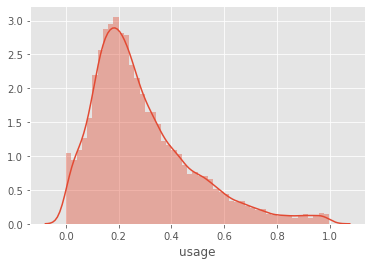

In [47]:
sns.distplot(data2['usage'])

In [48]:
data2['usage'].describe()

count    14857.000000
mean         0.287408
std          0.191687
min          0.000610
25%          0.153043
50%          0.239744
75%          0.380208
max          0.998217
Name: usage, dtype: float64

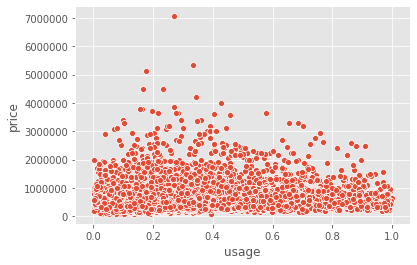

In [49]:
sns.scatterplot(data2['usage'],data2['price'])

In [50]:
data2.corr()['price']['usage']

0.19943241542354198

Answer: The size of a home relative to the size of it's lot does not appear to have a signifigant effect on price. 

Q3: Does the neighborhood a house is in matter?

In [51]:
data2.corr()['sqft_living']['sqft_living15'] #correlation between a home's sqft and that of it's 15 closest neighboors


0.7574869921064877

In [52]:
data2.corr()['sqft_lot']['sqft_lot15'] #correlation between a home's lot size and that of it's 15 closest neighboors

0.6959546773475881

In [53]:
#regression: sqft of 15 closest neighbors to predict sqft of home
sqft_df=data2[['sqft_living','sqft_living15']]
sqft_df.head()

f='sqft_living~sqft_living15'
model = ols(formula=f, data=sqft_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                 2.000e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:29:13   Log-Likelihood:            -1.1602e+05
No. Observations:               14857   AIC:                         2.320e+05
Df Residuals:                   14855   BIC:                         2.321e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        81.8808     15.095      5.424      0.000      52.293     111.469
sqft_living15     1.0059      0.007    141.416      0.000       0.992       1.020
==============================================================================
Omnibus:                     4436.552   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23592.186
Skew:                           1.339   Prob(JB):                         0.00
Kurtosis:                       8.562   Cond. No.                     6.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#regression: lot size of 15 closest neighbors to predict lot of home
lot_df=data2[['sqft_lot','sqft_lot15']]
lot_df.head()

f='sqft_lot~sqft_lot15'
model = ols(formula=f, data=lot_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sqft_lot   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.395e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:29:14   Log-Likelihood:            -1.7331e+05
No. Observations:               14857   AIC:                         3.466e+05
Df Residuals:                   14855   BIC:                         3.466e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1880.4758    258.594      7.272      0.000    1373.600    2387.352
sqft_lot15     1.0434      0.009    118.125      0.000       1.026       1.061
==============================================================================
Omnibus:                    29809.130   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        165987786.783
Skew:                          16.164   Prob(JB):                         0.00
Kurtosis:                     519.809   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

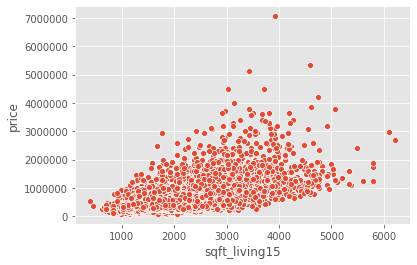

In [55]:
sns.scatterplot(data2['sqft_living15'],data2['price']) #square footage of a home's nearest 15 neighbors vs it's price


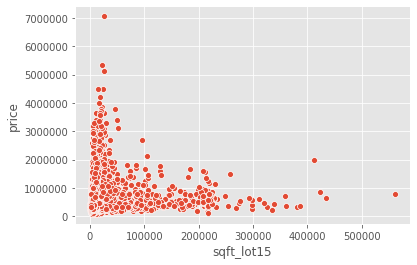

In [56]:
sns.scatterplot(data2['sqft_lot15'],data2['price']) #square footage of the lot of the nearest 15 neighbors vs it's price

Answer: While a home's squarefootage and lot size are highly correlated with those of its neighbors, they are poor predictors a homes actual home size or lot size. Additionally, the home size of a home's 15 closest neighbors is only loosly connected to a home's price.

# Preparing data for modelling

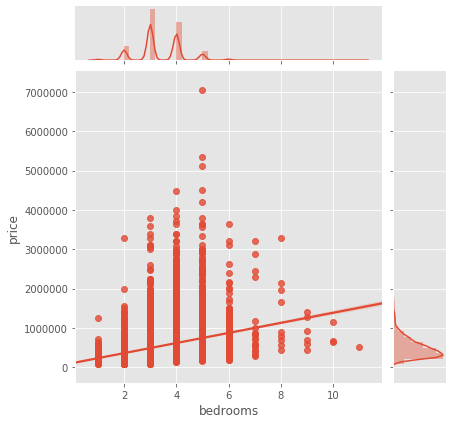

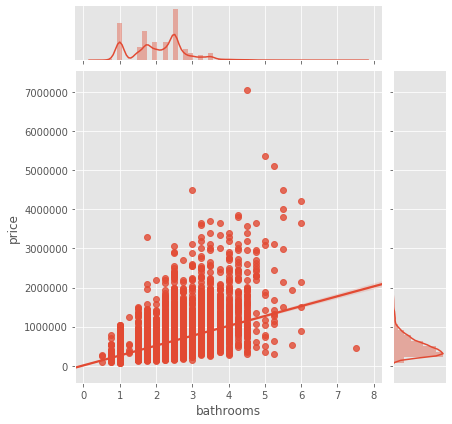

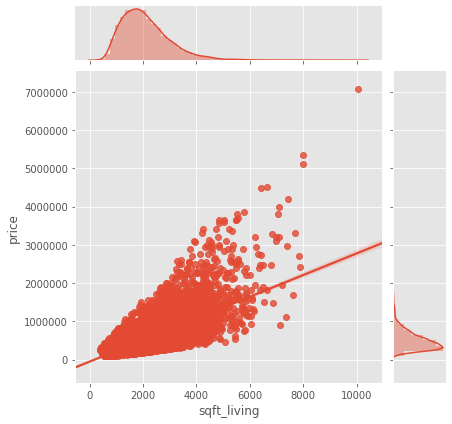

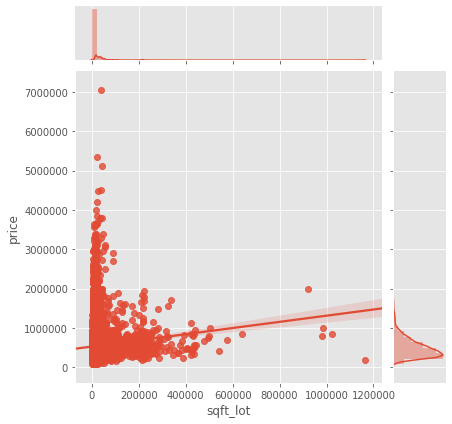

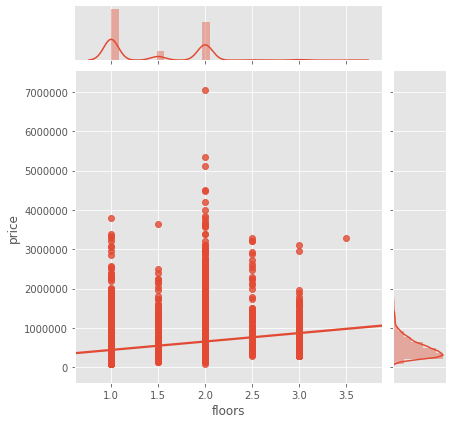

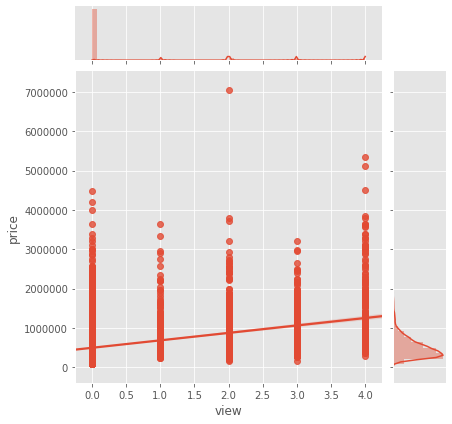

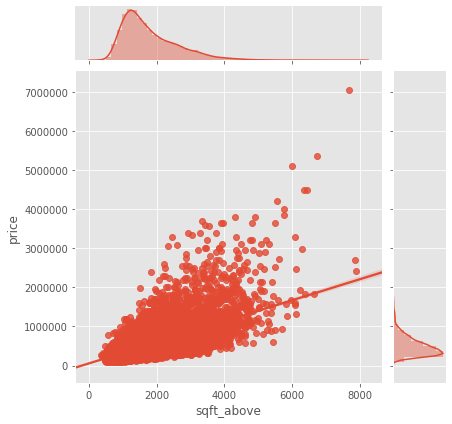

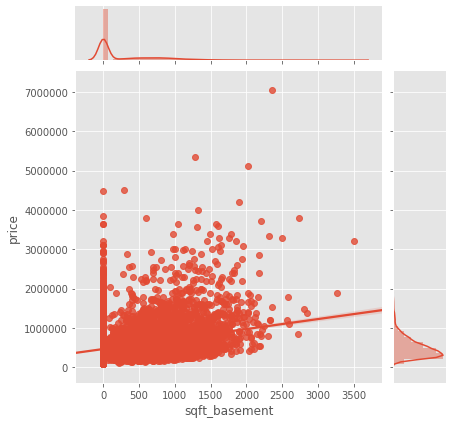

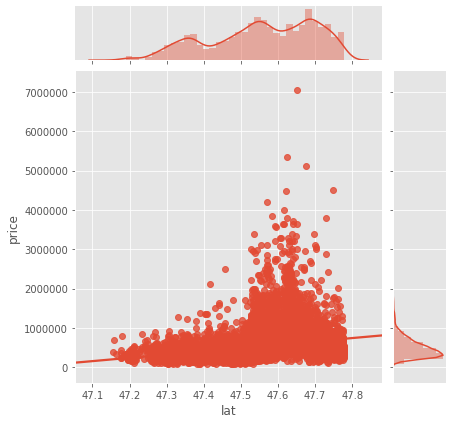

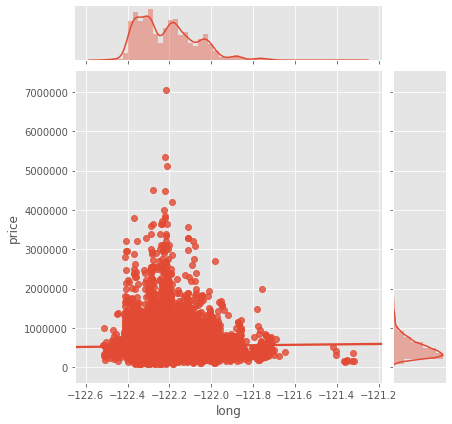

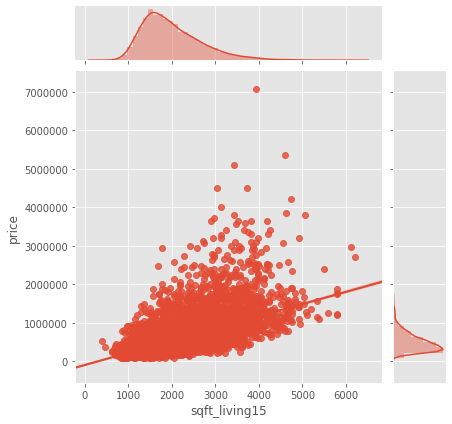

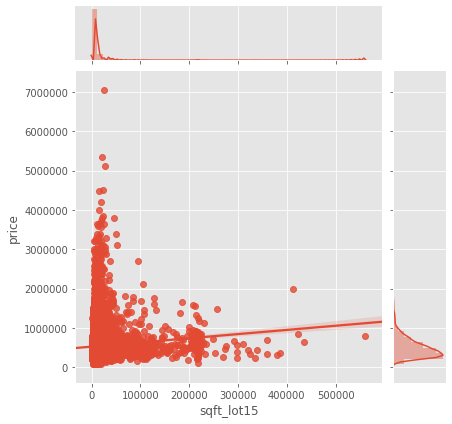

In [57]:
# Define list of non-catagory/dummy variables
cont_feat = ['bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','view', 'sqft_above','sqft_basement','lat','long', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = data2[feature], y = data2['price'], kind = 'reg')


varriables other then long and sqft_lot15 appear  to have a linear relationship with price

In [58]:
# test for colleations in the variables
df=data2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.873731
"(floors_2.0, floors)",0.837622
"(sqft_living, bathrooms)",0.771224
"(sqft_living, sqft_living15)",0.757487


multicollinearity issues (per table above)

(sqft_living, sqft_above)	0.873731

(floors, floors_2.0)	0.837622

(sqft_living, bathrooms)	0.771224

(sqft_living, sqft_living15)	0.757487



Dropping sqft_living elliminates the main collinearity issues. Floors will be tested to see if it is best as a catagory or not.


In [59]:
data2=data2.drop('sqft_living',axis=1)

In [60]:
data2.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,usage
1,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0.0,2170,400.0,...,0,0,0,0,0,0,0,0,0,0.354874
3,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,0.0,1050,910.0,...,0,0,0,0,0,0,0,0,0,0.392000
4,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,0.0,1680,0.0,...,0,0,0,0,0,0,0,0,0,0.207921
5,2014-05-12,1230000.0,4,4.50,101930,1.0,0.0,0.0,3890,1530.0,...,0,0,0,0,0,0,0,0,0,0.053174
8,2015-04-15,229500.0,3,1.00,7470,1.0,0.0,0.0,1050,730.0,...,0,0,0,0,0,0,0,0,0,0.238286


In [61]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [62]:
data2.columns=data2.columns.str.replace('.','_')
data2.columns=data2.columns.str.replace(' ','_')


# Initial model

In [63]:
# baseline model



y=data[['price']]
X=data.drop(['price','date'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 42534995592.25652
Test Mean Squarred Error: 44553462124.30715


In [64]:
outcome = 'price'

x_cols = list(X.columns)


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
temp = pd.concat([X_train,y_train], axis=1)

model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1657.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:31:45   Log-Likelihood:            -1.6846e+05
No. Observations:               12336   AIC:                         3.369e+05
Df Residuals:                   12320   BIC:                         3.371e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.97e+06   3.93e+06     -0.502      0.616   -9.66e+06    5.72e+06
bedrooms      -4.859e+04   2667.832    -18.215      0.000   -5.38e+04   -4.34e+04
bathrooms      5.828e+04   4421.112     13.181      0.000    4.96e+04    6.69e+04
sqft_living     140.8123      2.944     47.823      0.000     135.041     146.584
sqft_lot          0.1460      0.065      2.263      0.024       0.020       0.272
floors         1.995e+04   4864.600      4.101      0.000    1.04e+04    2.95e+04
waterfront     5.434e+05   2.42e+04     22.491      0.000    4.96e+05    5.91e+05
view           6.277e+04   2951.048     21.272      0.000     5.7e+04    6.86e+04
sqft_above       99.8294      2.913     34.265      0.000      94.119     105.540
sqft_basement    40.9828      3.573     11.470      0.000      33.979      47.987
yr_built      -2200.0661     91.059    -24.161      0.000   -2378.555   -2021.577
yr_renovated     13.0219      4.959      2.626      0.009       3.301      22.743
zipcode        -645.2555     44.366    -14.544      0.000    -732.219    -558.292
lat             6.72e+05   1.43e+04     46.886      0.000    6.44e+05       7e+05
long          -3.072e+05   1.76e+04    -17.476      0.000   -3.42e+05   -2.73e+05
sqft_living15    66.3256      4.531     14.637      0.000      57.444      75.207
sqft_lot15       -0.3590      0.101     -3.567      0.000      -0.556      -0.162
==============================================================================
Omnibus:                     7929.643   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251750.098
Skew:                           2.600   Prob(JB):                         0.00
Kurtosis:                      24.512   Cond. No.                     2.53e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

r^2=0.675, adj=0.674

Train Mean Squarred Error: 42,534,995,592.25652   
Test Mean Squarred Error: 44,553,462,124.30715


In [65]:
y = data2[['price']]
X=data2.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

temp = pd.concat([X_train,y_train], axis=1)


Train Mean Squarred Error: 25787801933.512756
Test Mean Squarred Error: 25033004505.2455


In [73]:

outcome = 'price'

x_cols = list(X.columns)


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     310.4
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:37:15   Log-Likelihood:            -1.5914e+05
No. Observations:               11885   AIC:                         3.186e+05
Df Residuals:                   11717   BIC:                         3.199e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.67e+04   1338.695    -12.474      0.000   -1.93e+04   -1.41e+04
bathrooms      1.316e+05   6564.579     20.041      0.000    1.19e+05    1.44e+05
sqft_lot          0.0997      0.044      2.285      0.022       0.014       0.185
floors         1.605e+05   2.93e+04      5.478      0.000    1.03e+05    2.18e+05
waterfront     6.249e+05   2.21e+04     28.229      0.000    5.81e+05    6.68e+05
view           6.158e+04   2545.150     24.197      0.000    5.66e+04    6.66e+04
sqft_above      233.9716      3.822     61.224      0.000     226.481     241.462
sqft_basement   149.9580      4.821     31.108      0.000     140.509     159.407
yr_built       2.691e+04   3147.089      8.551      0.000    2.07e+04    3.31e+04
zipcode        -920.3365    104.723     -8.788      0.000   -1125.611    -715.062
lat            1.583e+05   8.47e+04      1.869      0.062   -7758.152    3.24e+05
long          -2.286e+05   5.98e+04     -3.819      0.000   -3.46e+05   -1.11e+05
sqft_living15    35.7010      3.800      9.395      0.000      28.253      43.150
beds_2         -8.89e+04   1.69e+04     -5.255      0.000   -1.22e+05   -5.57e+04
beds_3        -1.894e+05   1.83e+04    -10.354      0.000   -2.25e+05   -1.54e+05
beds_4        -2.749e+05   2.01e+04    -13.673      0.000   -3.14e+05   -2.35e+05
beds_5         -3.52e+05   2.27e+04    -15.539      0.000   -3.96e+05   -3.08e+05
beds_6         -4.59e+05   2.76e+04    -16.647      0.000   -5.13e+05   -4.05e+05
beds_7         -4.88e+05   4.61e+04    -10.591      0.000   -5.78e+05   -3.98e+05
beds_8        -4.829e+05   6.65e+04     -7.266      0.000   -6.13e+05   -3.53e+05
beds_9        -8.127e+05   7.94e+04    -10.232      0.000   -9.68e+05   -6.57e+05
beds_10       -8.962e+05   9.76e+04     -9.185      0.000   -1.09e+06   -7.05e+05
beds_11       -6.421e+05    1.7e+05     -3.785      0.000   -9.75e+05    -3.1e+05
floors_1_5    -9.901e+04   1.56e+04     -6.349      0.000    -1.3e+05   -6.84e+04
floors_2_0    -1.922e+05   2.93e+04     -6.565      0.000    -2.5e+05   -1.35e+05
floors_2_5    -1.953e+05   4.61e+04     -4.233      0.000   -2.86e+05   -1.05e+05
floors_3_0    -3.541e+05   5.92e+04     -5.982      0.000    -4.7e+05   -2.38e+05
floors_3_5      5.68e+05   9.88e+04      5.749      0.000    3.74e+05    7.62e+05
views_1_0      3.204e+04   1.19e+04      2.695      0.007    8736.729    5.54e+04
views_2_0     -3.145e+04   7506.970     -4.189      0.000   -4.62e+04   -1.67e+04
views_3_0     -4.398e+04   9239.358     -4.761      0.000   -6.21e+04   -2.59e+04
views_4_0       5.61e+04   8440.764      6.646      0.000    3.96e+04    7.26e+04
reno_1934_0    9.463e+04    1.6e+05      0.591      0.554   -2.19e+05    4.08e+05
reno_1940_0   -1.069e+05    1.6e+05     -0.669      0.504    -4.2e+05    2.06e+05
reno_1944_0   -5.701e+04    1.6e+05     -0.356   


Drop initial variables with high p_values

drop year renovated, sqft_lot15 


add back age as substitute

In [74]:
data2['age']=pd.DatetimeIndex(data2['date']).year-data2['yr_built']


data3=data2.drop(['yr_renovated','sqft_lot15'],axis=1)
y = data3[['price']]
X = data3.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
temp = pd.concat([X_train,y_train], axis=1)


Train Mean Squarred Error: 25624875341.35972
Test Mean Squarred Error: 24850711454.54593


In [75]:
outcome = 'price'

x_cols = list(data3.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     303.0
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:37:30   Log-Likelihood:            -1.5929e+05
No. Observations:               11885   AIC:                         3.189e+05
Df Residuals:                   11718   BIC:                         3.201e+05
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.682e+04   1355.175    -12.414      0.000   -1.95e+04   -1.42e+04
bedrooms      -3.197e+04   5818.586     -5.494      0.000   -4.34e+04   -2.06e+04
bathrooms      3.776e+04   3638.807     10.378      0.000    3.06e+04    4.49e+04
sqft_lot          0.1082      0.044      2.449      0.014       0.022       0.195
floors         1.574e+05   2.97e+04      5.308      0.000    9.93e+04    2.16e+05
waterfront     6.357e+05   2.24e+04     28.381      0.000    5.92e+05     6.8e+05
view            6.27e+04   2575.670     24.342      0.000    5.76e+04    6.77e+04
sqft_above      243.3968      3.828     63.582      0.000     235.893     250.900
sqft_basement   151.3400      4.879     31.017      0.000     141.776     160.904
yr_built       2.774e+04   3185.491      8.709      0.000    2.15e+04     3.4e+04
zipcode        -927.4867    106.013     -8.749      0.000   -1135.289    -719.684
lat            1.723e+05   8.57e+04      2.010      0.044    4238.484     3.4e+05
long           -2.17e+05   6.06e+04     -3.582      0.000   -3.36e+05   -9.82e+04
sqft_living15    31.4055      3.838      8.182      0.000      23.882      38.929
beds_2         3.483e+04    1.5e+04      2.317      0.021    5359.085    6.43e+04
beds_3         3.076e+04   1.56e+04      1.971      0.049     169.473    6.13e+04
beds_4         2.421e+04   1.85e+04      1.309      0.191    -1.2e+04    6.05e+04
beds_5         2.855e+04   2.28e+04      1.249      0.212   -1.62e+04    7.33e+04
beds_6          353.4454   2.97e+04      0.012      0.990   -5.78e+04    5.85e+04
beds_7         4.157e+04    4.7e+04      0.885      0.376   -5.05e+04    1.34e+05
beds_8         1.055e+05   6.44e+04      1.638      0.102   -2.08e+04    2.32e+05
beds_9        -1.196e+05   7.37e+04     -1.623      0.105   -2.64e+05    2.49e+04
beds_10        -1.53e+05   8.56e+04     -1.788      0.074   -3.21e+05    1.47e+04
beds_11        1.046e+05   1.29e+05      0.811      0.417   -1.48e+05    3.57e+05
floors_1_5    -8.831e+04   1.58e+04     -5.599      0.000   -1.19e+05   -5.74e+04
floors_2_0    -1.887e+05   2.96e+04     -6.366      0.000   -2.47e+05   -1.31e+05
floors_2_5     -1.84e+05   4.67e+04     -3.941      0.000   -2.76e+05   -9.25e+04
floors_3_0    -3.397e+05   5.99e+04     -5.670      0.000   -4.57e+05   -2.22e+05
floors_3_5      5.45e+05      1e+05      5.449      0.000    3.49e+05    7.41e+05
views_1_0       3.03e+04    1.2e+04      2.518      0.012    6708.492    5.39e+04
views_2_0     -3.295e+04   7598.961     -4.336      0.000   -4.78e+04   -1.81e+04
views_3_0     -4.274e+04   9352.927     -4.569      0.000   -6.11e+04   -2.44e+04
views_4_0      5.663e+04   8544.726      6.627      0.000    3.99e+04    7.34e+04
reno_1934_0    7.637e+04   1.62e+05      0.471      0.637   -2.41e+05    3.94e+05
reno_1940_0   -1.054e+05   1.62e+05     -0.651   

r and adj. marginally better


drop bedrooms: it should have a positive not a negative coef

try bed/bath ratio variable

In [77]:
data4=data3
data4['bed_bath_r']=data4['bedrooms']/data4['bathrooms']
data4=data4.drop(['bedrooms'],axis=1)



y = data4[['price']]
X = data4.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
temp = pd.concat([X_train,y_train], axis=1)

Train Mean Squarred Error: 25002653426.033356
Test Mean Squarred Error: 26466816784675.883


In [78]:
outcome = 'price'

x_cols = list(data4.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     310.4
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:38:32   Log-Likelihood:            -1.5914e+05
No. Observations:               11885   AIC:                         3.186e+05
Df Residuals:                   11717   BIC:                         3.199e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.67e+04   1338.695    -12.474      0.000   -1.93e+04   -1.41e+04
bathrooms      1.316e+05   6564.579     20.041      0.000    1.19e+05    1.44e+05
sqft_lot          0.0997      0.044      2.285      0.022       0.014       0.185
floors         1.605e+05   2.93e+04      5.478      0.000    1.03e+05    2.18e+05
waterfront     6.249e+05   2.21e+04     28.229      0.000    5.81e+05    6.68e+05
view           6.158e+04   2545.150     24.197      0.000    5.66e+04    6.66e+04
sqft_above      233.9716      3.822     61.224      0.000     226.481     241.462
sqft_basement   149.9580      4.821     31.108      0.000     140.509     159.407
yr_built       2.691e+04   3147.089      8.551      0.000    2.07e+04    3.31e+04
zipcode        -920.3365    104.723     -8.788      0.000   -1125.611    -715.062
lat            1.583e+05   8.47e+04      1.869      0.062   -7758.152    3.24e+05
long          -2.286e+05   5.98e+04     -3.819      0.000   -3.46e+05   -1.11e+05
sqft_living15    35.7010      3.800      9.395      0.000      28.253      43.150
beds_2         -8.89e+04   1.69e+04     -5.255      0.000   -1.22e+05   -5.57e+04
beds_3        -1.894e+05   1.83e+04    -10.354      0.000   -2.25e+05   -1.54e+05
beds_4        -2.749e+05   2.01e+04    -13.673      0.000   -3.14e+05   -2.35e+05
beds_5         -3.52e+05   2.27e+04    -15.539      0.000   -3.96e+05   -3.08e+05
beds_6         -4.59e+05   2.76e+04    -16.647      0.000   -5.13e+05   -4.05e+05
beds_7         -4.88e+05   4.61e+04    -10.591      0.000   -5.78e+05   -3.98e+05
beds_8        -4.829e+05   6.65e+04     -7.266      0.000   -6.13e+05   -3.53e+05
beds_9        -8.127e+05   7.94e+04    -10.232      0.000   -9.68e+05   -6.57e+05
beds_10       -8.962e+05   9.76e+04     -9.185      0.000   -1.09e+06   -7.05e+05
beds_11       -6.421e+05    1.7e+05     -3.785      0.000   -9.75e+05    -3.1e+05
floors_1_5    -9.901e+04   1.56e+04     -6.349      0.000    -1.3e+05   -6.84e+04
floors_2_0    -1.922e+05   2.93e+04     -6.565      0.000    -2.5e+05   -1.35e+05
floors_2_5    -1.953e+05   4.61e+04     -4.233      0.000   -2.86e+05   -1.05e+05
floors_3_0    -3.541e+05   5.92e+04     -5.982      0.000    -4.7e+05   -2.38e+05
floors_3_5      5.68e+05   9.88e+04      5.749      0.000    3.74e+05    7.62e+05
views_1_0      3.204e+04   1.19e+04      2.695      0.007    8736.729    5.54e+04
views_2_0     -3.145e+04   7506.970     -4.189      0.000   -4.62e+04   -1.67e+04
views_3_0     -4.398e+04   9239.358     -4.761      0.000   -6.21e+04   -2.59e+04
views_4_0       5.61e+04   8440.764      6.646      0.000    3.96e+04    7.26e+04
reno_1934_0    9.463e+04    1.6e+05      0.591      0.554   -2.19e+05    4.08e+05
reno_1940_0   -1.069e+05    1.6e+05     -0.669      0.504    -4.2e+05    2.06e+05
reno_1944_0   -5.701e+04    1.6e+05     -0.356   

In [80]:
# drop high reno values

data6=data4

data6=data6.drop(['reno_2012_0', 'reno_2011_0', 'reno_2005_0','reno_2003_0', 'reno_2000_0'
                ,'reno_1999_0','reno_1998_0','reno_1997_0','reno_1996_0', 'reno_1994_0',
                 'reno_1993_0','reno_1992_0','reno_1990_0','reno_1989_0', 'reno_1988_0',
                 'reno_1984_0', 'reno_1983_0', 'reno_1982_0', 'reno_1981_0','reno_1980_0',
                 'reno_1979_0','reno_1978_0','reno_1977_0','reno_1976_0','reno_1975_0',
                 'reno_1974_0','reno_1973_0','reno_1972_0','reno_1971_0','reno_1969_0',
                 'reno_1968_0','reno_1967_0','reno_1965_0','reno_1964_0','reno_1962_0',
                 'reno_1960_0','reno_1959_0','reno_1958_0','reno_1957_0','reno_1955_0',
                 'reno_1953_0','reno_1951_0','reno_1950_0','reno_1948_0','reno_1945_0','reno_1944_0',
                  'reno_1940_0','reno_1934_0'],axis=1) 





y = data6[['price']]
X = data6.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
temp = pd.concat([X_train,y_train], axis=1)


Train Mean Squarred Error: 25099168854.409687
Test Mean Squarred Error: 24155367601.755604


In [81]:
outcome = 'price'

x_cols = list(data6.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     431.7
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:39:06   Log-Likelihood:            -1.5916e+05
No. Observations:               11885   AIC:                         3.186e+05
Df Residuals:                   11764   BIC:                         3.195e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.663e+04   1335.848    -12.449      0.000   -1.92e+04    -1.4e+04
bathrooms      1.321e+05   6543.750     20.180      0.000    1.19e+05    1.45e+05
sqft_lot          0.0988      0.044      2.266      0.023       0.013       0.184
floors         1.613e+05   2.93e+04      5.506      0.000    1.04e+05    2.19e+05
waterfront     6.165e+05   2.19e+04     28.145      0.000    5.74e+05    6.59e+05
view           6.166e+04   2536.963     24.305      0.000    5.67e+04    6.66e+04
sqft_above      233.8337      3.813     61.326      0.000     226.360     241.308
sqft_basement   150.1239      4.808     31.222      0.000     140.699     159.549
yr_built       2.704e+04   3142.274      8.604      0.000    2.09e+04    3.32e+04
zipcode        -913.1907    104.558     -8.734      0.000   -1118.141    -708.240
lat            1.599e+05   8.45e+04      1.892      0.058   -5741.594    3.26e+05
long          -2.201e+05   5.97e+04     -3.687      0.000   -3.37e+05   -1.03e+05
sqft_living15    35.5037      3.793      9.361      0.000      28.069      42.938
beds_2        -9.085e+04   1.68e+04     -5.421      0.000   -1.24e+05    -5.8e+04
beds_3        -1.908e+05   1.81e+04    -10.514      0.000   -2.26e+05   -1.55e+05
beds_4        -2.764e+05      2e+04    -13.843      0.000   -3.16e+05   -2.37e+05
beds_5        -3.531e+05   2.25e+04    -15.683      0.000   -3.97e+05   -3.09e+05
beds_6        -4.603e+05   2.74e+04    -16.773      0.000   -5.14e+05   -4.06e+05
beds_7        -4.937e+05   4.59e+04    -10.750      0.000   -5.84e+05   -4.04e+05
beds_8        -4.847e+05   6.64e+04     -7.301      0.000   -6.15e+05   -3.55e+05
beds_9        -8.166e+05   7.93e+04    -10.292      0.000   -9.72e+05   -6.61e+05
beds_10       -8.987e+05   9.75e+04     -9.216      0.000   -1.09e+06   -7.08e+05
beds_11       -5.948e+05   1.63e+05     -3.655      0.000   -9.14e+05   -2.76e+05
floors_1_5    -9.942e+04   1.56e+04     -6.380      0.000    -1.3e+05   -6.89e+04
floors_2_0     -1.93e+05   2.93e+04     -6.593      0.000    -2.5e+05   -1.36e+05
floors_2_5    -1.938e+05   4.61e+04     -4.203      0.000   -2.84e+05   -1.03e+05
floors_3_0    -3.559e+05   5.92e+04     -6.014      0.000   -4.72e+05    -2.4e+05
floors_3_5     5.693e+05   9.88e+04      5.762      0.000    3.76e+05    7.63e+05
views_1_0      3.101e+04   1.18e+04      2.623      0.009    7832.491    5.42e+04
views_2_0      -3.16e+04   7477.243     -4.227      0.000   -4.63e+04   -1.69e+04
views_3_0     -4.462e+04   9183.978     -4.859      0.000   -6.26e+04   -2.66e+04
views_4_0      5.693e+04   8400.265      6.778      0.000    4.05e+04    7.34e+04
reno_1954_0    3.304e+05    1.6e+05      2.069      0.039    1.74e+04    6.43e+05
reno_1956_0    -4.82e+05   1.14e+05     -4.233      0.000   -7.05e+05   -2.59e+05
reno_1963_0    -3.63e+05   1.13e+05     -3.199   

r unchanged
error slightly better

drop high p values

In [82]:

data7=data6.drop(['zip_98070','zip_98032','zip_98023','zip_98019','zip_98011','zip_98003'],axis=1) 





y = data7[['price']]
X = data7.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
temp = pd.concat([X_train,y_train], axis=1)


Train Mean Squarred Error: 25115453491.2662
Test Mean Squarred Error: 24171635055.084087


In [83]:
outcome = 'price'

x_cols = list(data7.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     450.3
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:39:36   Log-Likelihood:            -1.5917e+05
No. Observations:               11885   AIC:                         3.186e+05
Df Residuals:                   11769   BIC:                         3.194e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.604e+07   2.81e+07      0.571      0.568   -3.91e+07    7.12e+07
bathrooms      1.319e+05   6542.924     20.155      0.000    1.19e+05    1.45e+05
sqft_lot          0.0940      0.043      2.168      0.030       0.009       0.179
floors         1.251e+06   1.91e+06      0.656      0.512   -2.49e+06    4.99e+06
waterfront     6.151e+05   2.18e+04     28.240      0.000    5.72e+05    6.58e+05
view           6.167e+04   2536.965     24.307      0.000    5.67e+04    6.66e+04
sqft_above      233.7806      3.812     61.331      0.000     226.309     241.252
sqft_basement   150.3773      4.807     31.283      0.000     140.955     159.800
yr_built       2.696e+04   3141.605      8.583      0.000    2.08e+04    3.31e+04
zipcode       -1091.2950    319.441     -3.416      0.001   -1717.453    -465.137
lat            3.117e+05   3.48e+04      8.951      0.000    2.43e+05     3.8e+05
long          -1.651e+05   4.43e+04     -3.729      0.000   -2.52e+05   -7.83e+04
sqft_living15    35.5089      3.789      9.372      0.000      28.082      42.935
beds_2        -9.048e+04   1.68e+04     -5.399      0.000   -1.23e+05   -5.76e+04
beds_3        -1.902e+05   1.81e+04    -10.484      0.000   -2.26e+05   -1.55e+05
beds_4        -2.758e+05      2e+04    -13.810      0.000   -3.15e+05   -2.37e+05
beds_5        -3.523e+05   2.25e+04    -15.646      0.000   -3.96e+05   -3.08e+05
beds_6        -4.595e+05   2.74e+04    -16.745      0.000   -5.13e+05   -4.06e+05
beds_7        -4.921e+05   4.59e+04    -10.718      0.000   -5.82e+05   -4.02e+05
beds_8         -4.84e+05   6.64e+04     -7.290      0.000   -6.14e+05   -3.54e+05
beds_9        -8.166e+05   7.94e+04    -10.291      0.000   -9.72e+05   -6.61e+05
beds_10       -8.981e+05   9.75e+04     -9.209      0.000   -1.09e+06   -7.07e+05
beds_11       -5.977e+05   1.63e+05     -3.673      0.000   -9.17e+05   -2.79e+05
floors_1_5    -6.443e+05   9.53e+05     -0.676      0.499   -2.51e+06    1.22e+06
floors_2_0    -1.282e+06   1.91e+06     -0.672      0.501   -5.02e+06    2.46e+06
floors_2_5    -1.827e+06   2.86e+06     -0.639      0.523   -7.43e+06    3.78e+06
floors_3_0    -2.534e+06   3.81e+06     -0.664      0.506      -1e+07    4.94e+06
floors_3_5    -2.153e+06   4.77e+06     -0.452      0.652   -1.15e+07    7.19e+06
views_1_0      3.027e+04   1.18e+04      2.561      0.010    7103.267    5.34e+04
views_2_0     -3.163e+04   7476.300     -4.231      0.000   -4.63e+04    -1.7e+04
views_3_0       -4.5e+04   9172.437     -4.906      0.000    -6.3e+04    -2.7e+04
views_4_0      5.741e+04   8388.265      6.844      0.000     4.1e+04    7.39e+04
reno_1954_0    3.276e+05    1.6e+05      2.051      0.040    1.45e+04    6.41e+05
reno_1956_0   -4.833e+05   1.14e+05     -4.243      0.000   -7.07e+05    -2.6e+05
reno_1963_0   -3.594e+05   1.13e+05     -3.167   

data7 looks potentially worse than data6

Go back to data6 and check for forrelations\

In [84]:
# test for colleations in the variables
df=data6.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(age, yr_built)",0.999870
"(floors, floors_2_0)",0.837622


try dropping floors and yr_built

In [85]:
data8=data6.drop(['floors','yr_built'],axis=1)

In [86]:



y = data8[['price']]
X = data8.drop(['date','price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
temp = pd.concat([X_train,y_train], axis=1)


Train Mean Squarred Error: 25257112949.953575
Test Mean Squarred Error: 24352989944.396454


In [87]:
outcome = 'price'

x_cols = list(data8.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     432.0
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:41:18   Log-Likelihood:            -1.5920e+05
No. Observations:               11885   AIC:                         3.186e+05
Df Residuals:                   11765   BIC:                         3.195e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.291e+04   1268.215    -10.178      0.000   -1.54e+04   -1.04e+04
bathrooms      1.326e+05   6563.663     20.209      0.000     1.2e+05    1.46e+05
sqft_lot          0.0994      0.044      2.273      0.023       0.014       0.185
waterfront     6.152e+05    2.2e+04     27.997      0.000    5.72e+05    6.58e+05
view           6.179e+04   2544.777     24.283      0.000    5.68e+04    6.68e+04
sqft_above      233.6336      3.825     61.086      0.000     226.137     241.131
sqft_basement   149.3319      4.822     30.967      0.000     139.879     158.784
zipcode        -359.2988     82.793     -4.340      0.000    -521.587    -197.011
lat            1.707e+05   8.48e+04      2.014      0.044    4540.389    3.37e+05
long          -2.187e+05   5.99e+04     -3.651      0.000   -3.36e+05   -1.01e+05
sqft_living15    35.4856      3.804      9.327      0.000      28.028      42.943
beds_2        -9.221e+04   1.68e+04     -5.485      0.000   -1.25e+05   -5.93e+04
beds_3        -1.919e+05   1.82e+04    -10.545      0.000   -2.28e+05   -1.56e+05
beds_4        -2.778e+05      2e+04    -13.869      0.000   -3.17e+05   -2.39e+05
beds_5        -3.545e+05   2.26e+04    -15.696      0.000   -3.99e+05    -3.1e+05
beds_6        -4.602e+05   2.75e+04    -16.719      0.000   -5.14e+05   -4.06e+05
beds_7        -4.991e+05   4.61e+04    -10.836      0.000   -5.89e+05   -4.09e+05
beds_8        -4.911e+05   6.66e+04     -7.374      0.000   -6.22e+05   -3.61e+05
beds_9        -8.158e+05   7.96e+04    -10.249      0.000   -9.72e+05    -6.6e+05
beds_10       -9.102e+05   9.78e+04     -9.305      0.000    -1.1e+06   -7.18e+05
beds_11       -6.077e+05   1.63e+05     -3.724      0.000   -9.28e+05   -2.88e+05
floors_1_5    -1.968e+04   6147.330     -3.202      0.001   -3.17e+04   -7631.081
floors_2_0    -3.178e+04   5230.421     -6.077      0.000    -4.2e+04   -2.15e+04
floors_2_5     4.615e+04   1.94e+04      2.381      0.017    8151.313    8.41e+04
floors_3_0    -3.335e+04   1.55e+04     -2.145      0.032   -6.38e+04   -2868.555
floors_3_5     9.694e+05   1.72e+05      5.643      0.000    6.33e+05    1.31e+06
views_1_0      3.023e+04   1.19e+04      2.549      0.011    6982.100    5.35e+04
views_2_0      -3.11e+04   7500.185     -4.147      0.000   -4.58e+04   -1.64e+04
views_3_0     -4.525e+04   9212.152     -4.912      0.000   -6.33e+04   -2.72e+04
views_4_0      5.738e+04   8426.138      6.809      0.000    4.09e+04    7.39e+04
reno_1954_0    3.199e+05    1.6e+05      1.997      0.046    5922.097    6.34e+05
reno_1956_0    -4.77e+05   1.14e+05     -4.175      0.000   -7.01e+05   -2.53e+05
reno_1963_0   -3.593e+05   1.14e+05     -3.157      0.002   -5.82e+05   -1.36e+05
reno_1970_0   -1.486e+05   5.68e+04     -2.615      0.009    -2.6e+05   -3.72e+04
reno_1985_0   -7.511e+04   5.69e+04     -1.320   

Drop age



In [88]:
data9=data8.drop(['age','floors_3_0'], axis=1)



y = data9[['price']]
X = data9.drop(['price','date'], axis=1)
# X = data9.drop(['date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
temp = pd.concat([X_train,y_train], axis=1)


Train Mean Squarred Error: 25269073756.732647
Test Mean Squarred Error: 24332822392.586823


In [89]:
outcome = 'price'

x_cols = list(data9.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     439.2
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:            -1.5920e+05
No. Observations:               11885   AIC:                         3.186e+05
Df Residuals:                   11767   BIC:                         3.195e+05
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.296e+04   1261.978    -10.267      0.000   -1.54e+04   -1.05e+04
bathrooms       1.31e+05   6503.543     20.146      0.000    1.18e+05    1.44e+05
sqft_lot          0.0906      0.044      2.080      0.038       0.005       0.176
waterfront     6.144e+05    2.2e+04     27.972      0.000    5.71e+05    6.57e+05
view            6.16e+04   2541.040     24.243      0.000    5.66e+04    6.66e+04
sqft_above      232.9101      3.812     61.099      0.000     225.438     240.382
sqft_basement   151.8255      4.703     32.285      0.000     142.607     161.044
zipcode        -363.0121     82.694     -4.390      0.000    -525.105    -200.919
lat            1.736e+05   8.48e+04      2.047      0.041    7395.317     3.4e+05
long          -2.206e+05   5.98e+04     -3.689      0.000   -3.38e+05   -1.03e+05
sqft_living15    35.5541      3.801      9.354      0.000      28.103      43.005
beds_2        -9.201e+04   1.68e+04     -5.475      0.000   -1.25e+05   -5.91e+04
beds_3        -1.916e+05   1.82e+04    -10.537      0.000   -2.27e+05   -1.56e+05
beds_4         -2.77e+05      2e+04    -13.841      0.000   -3.16e+05   -2.38e+05
beds_5        -3.532e+05   2.26e+04    -15.647      0.000   -3.97e+05   -3.09e+05
beds_6        -4.585e+05   2.75e+04    -16.661      0.000   -5.12e+05   -4.05e+05
beds_7        -4.954e+05    4.6e+04    -10.761      0.000   -5.86e+05   -4.05e+05
beds_8        -4.881e+05   6.66e+04     -7.330      0.000   -6.19e+05   -3.58e+05
beds_9        -8.099e+05   7.95e+04    -10.182      0.000   -9.66e+05   -6.54e+05
beds_10       -9.071e+05   9.78e+04     -9.273      0.000    -1.1e+06   -7.15e+05
beds_11       -6.014e+05   1.63e+05     -3.686      0.000   -9.21e+05   -2.82e+05
floors_1_5    -1.643e+04   5835.930     -2.815      0.005   -2.79e+04   -4987.131
floors_2_0    -2.831e+04   4866.432     -5.818      0.000   -3.79e+04   -1.88e+04
floors_2_5     5.213e+04   1.92e+04      2.712      0.007    1.45e+04    8.98e+04
floors_3_5     9.768e+05   1.72e+05      5.687      0.000     6.4e+05    1.31e+06
views_1_0      3.074e+04   1.19e+04      2.592      0.010    7488.192     5.4e+04
views_2_0     -3.107e+04   7498.330     -4.144      0.000   -4.58e+04   -1.64e+04
views_3_0     -4.497e+04   9212.716     -4.881      0.000    -6.3e+04   -2.69e+04
views_4_0      5.698e+04   8424.755      6.763      0.000    4.05e+04    7.35e+04
reno_1954_0     3.21e+05    1.6e+05      2.004      0.045    7076.119    6.35e+05
reno_1956_0   -4.756e+05   1.14e+05     -4.165      0.000   -6.99e+05   -2.52e+05
reno_1963_0   -3.566e+05   1.14e+05     -3.134      0.002    -5.8e+05   -1.34e+05
reno_1970_0   -1.464e+05   5.68e+04     -2.580      0.010   -2.58e+05   -3.52e+04
reno_1985_0   -7.394e+04   5.69e+04     -1.300      0.194   -1.85e+05    3.75e+04
reno_1986_0   -1.419e+05   5.08e+04     -2.793   

In [90]:
# test for colleations in the variables
df=data9.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,


no more correlations but values are not improving 

In [101]:
data10=data9.drop(['zipcode'], axis=1)

y = data10[['price']]

X = data10.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
temp = pd.concat([X_train,y_train], axis=1)


Train Mean Squarred Error: 25269073756.732594
Test Mean Squarred Error: 24332822392.59151


In [102]:
outcome = 'price'

x_cols = list(data10.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     439.2
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:55:34   Log-Likelihood:            -1.5920e+05
No. Observations:               11885   AIC:                         3.186e+05
Df Residuals:                   11767   BIC:                         3.195e+05
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.559e+07    8.1e+06     -4.391      0.000   -5.15e+07   -1.97e+07
bathrooms       1.31e+05   6503.543     20.146      0.000    1.18e+05    1.44e+05
sqft_lot          0.0906      0.044      2.080      0.038       0.005       0.176
waterfront     6.144e+05    2.2e+04     27.972      0.000    5.71e+05    6.57e+05
view            6.16e+04   2541.040     24.243      0.000    5.66e+04    6.66e+04
sqft_above      232.9101      3.812     61.099      0.000     225.438     240.382
sqft_basement   151.8255      4.703     32.285      0.000     142.607     161.044
lat            1.736e+05   8.48e+04      2.047      0.041    7395.317     3.4e+05
long          -2.206e+05   5.98e+04     -3.689      0.000   -3.38e+05   -1.03e+05
sqft_living15    35.5541      3.801      9.354      0.000      28.103      43.005
beds_2        -9.201e+04   1.68e+04     -5.475      0.000   -1.25e+05   -5.91e+04
beds_3        -1.916e+05   1.82e+04    -10.537      0.000   -2.27e+05   -1.56e+05
beds_4         -2.77e+05      2e+04    -13.841      0.000   -3.16e+05   -2.38e+05
beds_5        -3.532e+05   2.26e+04    -15.647      0.000   -3.97e+05   -3.09e+05
beds_6        -4.585e+05   2.75e+04    -16.661      0.000   -5.12e+05   -4.05e+05
beds_7        -4.954e+05    4.6e+04    -10.761      0.000   -5.86e+05   -4.05e+05
beds_8        -4.881e+05   6.66e+04     -7.330      0.000   -6.19e+05   -3.58e+05
beds_9        -8.099e+05   7.95e+04    -10.182      0.000   -9.66e+05   -6.54e+05
beds_10       -9.071e+05   9.78e+04     -9.273      0.000    -1.1e+06   -7.15e+05
beds_11       -6.014e+05   1.63e+05     -3.686      0.000   -9.21e+05   -2.82e+05
floors_1_5    -1.643e+04   5835.930     -2.815      0.005   -2.79e+04   -4987.131
floors_2_0    -2.831e+04   4866.432     -5.818      0.000   -3.79e+04   -1.88e+04
floors_2_5     5.213e+04   1.92e+04      2.712      0.007    1.45e+04    8.98e+04
floors_3_5     9.768e+05   1.72e+05      5.687      0.000     6.4e+05    1.31e+06
views_1_0      3.074e+04   1.19e+04      2.592      0.010    7488.192     5.4e+04
views_2_0     -3.107e+04   7498.330     -4.144      0.000   -4.58e+04   -1.64e+04
views_3_0     -4.497e+04   9212.716     -4.881      0.000    -6.3e+04   -2.69e+04
views_4_0      5.698e+04   8424.755      6.763      0.000    4.05e+04    7.35e+04
reno_1954_0     3.21e+05    1.6e+05      2.004      0.045    7076.119    6.35e+05
reno_1956_0   -4.756e+05   1.14e+05     -4.165      0.000   -6.99e+05   -2.52e+05
reno_1963_0   -3.566e+05   1.14e+05     -3.134      0.002    -5.8e+05   -1.34e+05
reno_1970_0   -1.464e+05   5.68e+04     -2.580      0.010   -2.58e+05   -3.52e+04
reno_1985_0   -7.394e+04   5.69e+04     -1.300      0.194   -1.85e+05    3.75e+04
reno_1986_0   -1.419e+05   5.08e+04     -2.793      0.005   -2.42e+05   -4.23e+04
reno_1987_0    7.724e+04   6.07e+04      1.273   

very little change

high p values:
zip_98003	
zip_98011
zip_98019	
zip_98028
zip_98030
zip_98031
zip_98032
zip_98092
zip_98146
zip_98148
zip_98155
zip_98166
zip_98168	
zip_98198

In [94]:
# $ value of error
np.sqrt(45455163541.45786)

213202.16589298024

In [104]:
data9['price'].describe()

count    1.485700e+04
mean     5.414836e+05
std      3.673019e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.495000e+05
max      7.060000e+06
Name: price, dtype: float64

if location matters than some underieing location variable is potentially changed by both lat and long


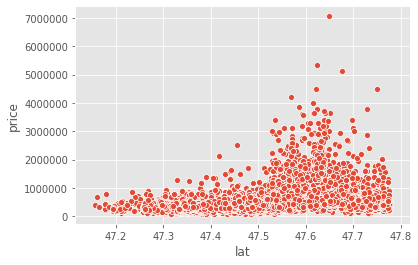

In [103]:
sns.scatterplot(data10['lat'],data10['price'])


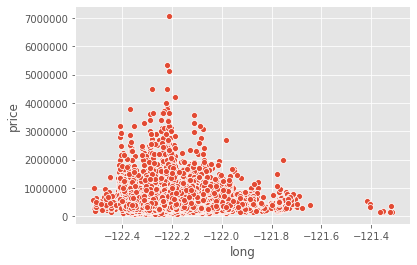

In [104]:
sns.scatterplot(data10['long'],data10['price'])


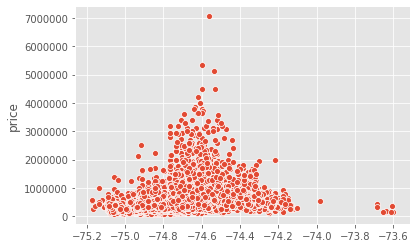

In [105]:
sns.scatterplot(data10['lat']+data10['long'],data10['price'])


In [108]:

np.corrcoef(data10['lat']*data10['long'],data10['price'])

array([[ 1.        , -0.27917023],
       [-0.27917023,  1.        ]])

new variable doesn't appear to be a good predictor

try dropping high p value zipcodes

In [110]:
data11=data10.drop(['zip_98198','zip_98188','zip_98178','zip_98168','zip_98155','zip_98148','zip_98092','zip_98077',
                   'zip_98032','zip_98031','zip_98030','zip_98028','zip_98014','zip_98011','zip_98003'],axis=1)
y = data11[['price']]
X = data11.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
temp = pd.concat([X_train,y_train], axis=1)


Train Mean Squarred Error: 25296711639.121983
Test Mean Squarred Error: 24334411833.42055


In [111]:
outcome = 'price'

x_cols = list(data11.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     503.8
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:01:47   Log-Likelihood:            -1.5921e+05
No. Observations:               11885   AIC:                         3.186e+05
Df Residuals:                   11782   BIC:                         3.194e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.213e+07   4.08e+06     -7.881      0.000   -4.01e+07   -2.41e+07
bathrooms      1.309e+05   6494.588     20.156      0.000    1.18e+05    1.44e+05
sqft_lot          0.0974      0.043      2.245      0.025       0.012       0.182
waterfront      6.15e+05   2.19e+04     28.034      0.000    5.72e+05    6.58e+05
view           6.143e+04   2532.635     24.255      0.000    5.65e+04    6.64e+04
sqft_above      232.8376      3.804     61.216      0.000     225.382     240.293
sqft_basement   151.5758      4.691     32.315      0.000     142.381     160.770
lat            3.353e+05   1.86e+04     18.049      0.000    2.99e+05    3.72e+05
long          -1.297e+05   3.15e+04     -4.120      0.000   -1.91e+05    -6.8e+04
sqft_living15    35.4485      3.767      9.410      0.000      28.064      42.833
beds_2        -9.174e+04   1.68e+04     -5.463      0.000   -1.25e+05   -5.88e+04
beds_3        -1.907e+05   1.81e+04    -10.512      0.000   -2.26e+05   -1.55e+05
beds_4        -2.762e+05      2e+04    -13.835      0.000   -3.15e+05   -2.37e+05
beds_5        -3.521e+05   2.25e+04    -15.634      0.000   -3.96e+05   -3.08e+05
beds_6        -4.576e+05   2.75e+04    -16.661      0.000   -5.11e+05   -4.04e+05
beds_7         -4.93e+05    4.6e+04    -10.722      0.000   -5.83e+05   -4.03e+05
beds_8        -4.863e+05   6.65e+04     -7.308      0.000   -6.17e+05   -3.56e+05
beds_9        -8.093e+05   7.95e+04    -10.179      0.000   -9.65e+05   -6.53e+05
beds_10       -9.054e+05   9.78e+04     -9.260      0.000    -1.1e+06   -7.14e+05
beds_11       -6.026e+05   1.63e+05     -3.695      0.000   -9.22e+05   -2.83e+05
floors_1_5    -1.655e+04   5828.226     -2.840      0.005    -2.8e+04   -5128.562
floors_2_0    -2.806e+04   4858.147     -5.775      0.000   -3.76e+04   -1.85e+04
floors_2_5     5.273e+04   1.92e+04      2.745      0.006    1.51e+04    9.04e+04
floors_3_5     9.792e+05   1.72e+05      5.702      0.000    6.43e+05    1.32e+06
views_1_0      3.009e+04   1.18e+04      2.541      0.011    6882.054    5.33e+04
views_2_0     -3.123e+04   7491.179     -4.169      0.000   -4.59e+04   -1.65e+04
views_3_0       -4.5e+04   9210.373     -4.886      0.000   -6.31e+04   -2.69e+04
views_4_0       5.72e+04   8420.451      6.793      0.000    4.07e+04    7.37e+04
reno_1954_0    3.165e+05    1.6e+05      1.977      0.048    2622.120     6.3e+05
reno_1956_0   -4.764e+05   1.14e+05     -4.173      0.000      -7e+05   -2.53e+05
reno_1963_0   -3.527e+05   1.14e+05     -3.100      0.002   -5.76e+05    -1.3e+05
reno_1970_0   -1.457e+05   5.67e+04     -2.568      0.010   -2.57e+05   -3.45e+04
reno_1985_0   -7.573e+04   5.69e+04     -1.332      0.183   -1.87e+05    3.57e+04
reno_1986_0     -1.4e+05   5.08e+04     -2.756      0.006    -2.4e+05   -4.04e+04
reno_1987_0    7.538e+04   6.07e+04      1.243   

In [ ]:
drop remaining hihg p values

In [113]:
data12=data11.drop(['zip_98166','zip_98058','zip_98055','zip_98042','zip_98023','zip_98019','reno_2015_0',
                    'reno_2010_0','reno_2004_0','reno_1991_0','reno_1987_0','reno_1985_0'],axis=1)

y = data12[['price']]
X = data12.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
temp = pd.concat([X_train,y_train], axis=1)


Train Mean Squarred Error: 25366678836.011765
Test Mean Squarred Error: 24585700133.95531


In [115]:
train_rmse = mean_squared_error(y_train, y_hat_train)**0.5
test_rmse = mean_squared_error(y_test, y_hat_test)**0.5
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 159269.20240904004
Test RMSE: 156798.27847892753


In [114]:
outcome = 'price'

x_cols = list(data12.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     569.6
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:05:56   Log-Likelihood:            -1.5923e+05
No. Observations:               11885   AIC:                         3.186e+05
Df Residuals:                   11794   BIC:                         3.193e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.972e+07   3.27e+06     -9.083      0.000   -3.61e+07   -2.33e+07
bathrooms      1.312e+05   6494.082     20.206      0.000    1.18e+05    1.44e+05
sqft_lot          0.0910      0.043      2.100      0.036       0.006       0.176
waterfront     6.163e+05   2.19e+04     28.146      0.000    5.73e+05    6.59e+05
view           6.137e+04   2527.137     24.283      0.000    5.64e+04    6.63e+04
sqft_above      232.9800      3.802     61.276      0.000     225.527     240.433
sqft_basement   151.6409      4.690     32.331      0.000     142.447     160.835
lat            3.235e+05   1.68e+04     19.240      0.000    2.91e+05    3.56e+05
long          -1.146e+05   2.45e+04     -4.679      0.000   -1.63e+05   -6.66e+04
sqft_living15    35.3989      3.762      9.409      0.000      28.024      42.774
beds_2        -9.068e+04   1.68e+04     -5.400      0.000   -1.24e+05   -5.78e+04
beds_3        -1.905e+05   1.81e+04    -10.503      0.000   -2.26e+05   -1.55e+05
beds_4        -2.763e+05      2e+04    -13.844      0.000   -3.15e+05   -2.37e+05
beds_5        -3.525e+05   2.25e+04    -15.657      0.000   -3.97e+05   -3.08e+05
beds_6        -4.597e+05   2.75e+04    -16.746      0.000   -5.14e+05   -4.06e+05
beds_7        -4.943e+05    4.6e+04    -10.744      0.000   -5.84e+05   -4.04e+05
beds_8        -4.873e+05   6.66e+04     -7.318      0.000   -6.18e+05   -3.57e+05
beds_9        -7.927e+05   7.89e+04    -10.046      0.000   -9.47e+05   -6.38e+05
beds_10       -9.078e+05   9.79e+04     -9.278      0.000    -1.1e+06   -7.16e+05
beds_11       -6.038e+05   1.63e+05     -3.699      0.000   -9.24e+05   -2.84e+05
floors_1_5    -1.689e+04   5827.738     -2.898      0.004   -2.83e+04   -5466.329
floors_2_0    -2.859e+04   4855.177     -5.889      0.000   -3.81e+04   -1.91e+04
floors_2_5     5.138e+04   1.92e+04      2.674      0.007    1.37e+04     8.9e+04
floors_3_5     9.788e+05   1.72e+05      5.694      0.000    6.42e+05    1.32e+06
views_1_0      3.113e+04   1.18e+04      2.628      0.009    7911.572    5.44e+04
views_2_0     -3.032e+04   7486.763     -4.050      0.000    -4.5e+04   -1.56e+04
views_3_0     -4.505e+04   9212.264     -4.890      0.000   -6.31e+04    -2.7e+04
views_4_0      5.651e+04   8415.164      6.715      0.000       4e+04     7.3e+04
reno_1954_0    3.156e+05    1.6e+05      1.969      0.049    1411.056     6.3e+05
reno_1956_0   -4.773e+05   1.14e+05     -4.178      0.000   -7.01e+05   -2.53e+05
reno_1963_0   -3.525e+05   1.14e+05     -3.096      0.002   -5.76e+05   -1.29e+05
reno_1970_0   -1.454e+05   5.68e+04     -2.561      0.010   -2.57e+05   -3.41e+04
reno_1986_0   -1.379e+05   5.08e+04     -2.713      0.007   -2.37e+05   -3.83e+04
reno_1995_0    3.192e+05   6.56e+04      4.869      0.000    1.91e+05    4.48e+05
reno_2001_0    3.414e+05   5.38e+04      6.346   

# Conclusion

*My final model (above) seems to work reasonably well but is questionable at long term predictions.

With an R-squared of 0.813 or 81.3% a clear majority of differences between my data and average are explained. 

A hypothetical home with no feutures i.e.the intercept, would have no a negative value. However, given that a home with no lot, sqft, or bathrooms could not exist, and all thesse feutures add value, this makes sense.  

Most significantly certain zipcodes are more likely to add a lot, $, to a homes value. Additionally, waterfront homes are very likely worth more. Noteworthy to a developer a basement's squarefootage is less valuable than that above ground. 

Additionally the model has an RMSE of $156,798.28 so, particulrly with cheaper homes, this model should be taken with a grain of salt.


# Future work

It is worth exploring in the future non linear models. 

Additionally prices are likely to change over time so looking at homes sold over more years would be helpfull.

